<a href="https://colab.research.google.com/github/yadavneha22/FDS_LABwork/blob/main/a_b_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A/B testing has the ability to teach data scientists valuable lessons that both enhance understanding of audiences and underlying data sets, but also help focus on core use cases through methodical design of experiments.
A/B testing has the ability to teach data scientists valuable lessons that both enhance understanding of audiences and underlying data sets, but also help focus on core use cases through methodical design of experiments.
For instance, let’s say you own a company and want to increase the sales of your product. Here, either you can use random experiments, or you can apply scientific and statistical methods. A/B testing is one of the most prominent and widely used statistical tools.

In [27]:
 %matplotlib inline
 
from pathlib import Path
import random 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [9]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

here we use web_page_data.csv dataset

In [15]:
WEB_PAGE_DATA_CSV = DATA / '/content/web_page_data.csv'

In [16]:
session_times = pd.read_csv('/content/web_page_data.csv')
session_times.Time = 100 * session_times.Time

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


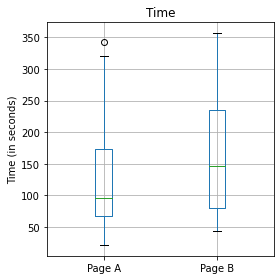

In [17]:
 ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
 
plt.tight_layout()
plt.show()

In [28]:
 mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

35.66666666666667


In [29]:
 # Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

35.09523809523809


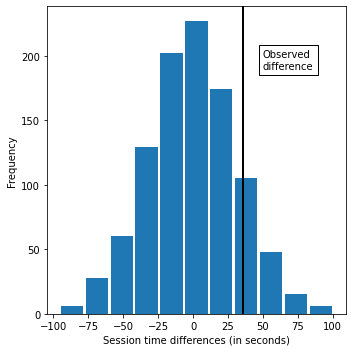

In [30]:
 random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]
 
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')
 
plt.tight_layout()
plt.show()

2.For this project, you will be working to understand the results of an A/B test run by an e-commerce website. Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.




In [35]:
df = pd.read_csv('/content/ab_data.csv')

For now, consider you need to make the decision just based on all the data provided. If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be? You can state your hypothesis in terms of words or in terms of $p_{old}$ and $p_{new}$, which are the converted rates for the old and new pages.

Null Hypothesis: The probability of old page better than new page is greater or equal to probability of new page.

Alternative Hypothesis: The probability of new page being better than new page is less than that of a new page.


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233014 entries, 0 to 233013
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       233014 non-null  int64  
 1   timestamp     233014 non-null  object 
 2   group         233014 non-null  object 
 3   landing_page  233013 non-null  object 
 4   converted     233013 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.9+ MB


In [59]:
df2 = df.drop(df[((df.landing_page == 'new_page') & (df.group != 'treatment')) | ((df.landing_page != 'new_page') & (df.group == 'treatment'))].index)

In [60]:
#check for info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229934 entries, 0 to 233013
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       229934 non-null  int64  
 1   timestamp     229934 non-null  object 
 2   group         229934 non-null  object 
 3   landing_page  229933 non-null  object 
 4   converted     229933 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 10.5+ MB


In [65]:
# convert rate is how many users converted (i.e. converted = 1)
p_new = df2.converted.mean()
p_new

0.11962615196600748

In [66]:
p_old = df2.converted.mean() # the same!!!
p_old

0.11962615196600748

In [67]:
# number of users who got the new page (i.e. group = treatment)
n_new = df2[df2.group == 'treatment'].count()[0]
n_new

115006

In [68]:
# number of users who reamined with old page (i.e. group = control)
n_old = df2[df2.group == 'control'].count()[0]
n_old

114928

In [50]:
# simulating n_new transaction that have probabiliy of receiving new page, using binomial gives the outout as the number of 1's
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
new_converted_simulation.mean()

0.11962762812375007

In [70]:
# simulating n_new transaction that have probabiliy of having old page, using binomial gives the outout as the number of 1's
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
old_converted_simulation.mean()

0.11962186238340528

In [54]:
# probabilty of new and old page based upon simulated values in e. and f.
new_converted_simulation.mean() - old_converted_simulation.mean()


-1.1607745663833047e-05

In [71]:
# alternatively
p_diffs_alt = new_converted_simulation - old_converted_simulation

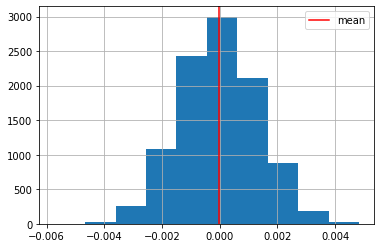

In [58]:
# alternatively
# histogram
plt.hist(p_diffs_alt)
plt.grid()
plt.axvline(p_diffs_alt.mean(), color='r', label='mean')
plt.legend();